<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_2_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.159503,84.041515,28.243779,37.479897,0.000245,204.924939,204.923372,0.001566
1,0.0,1.0,71.746582,23.412244,56.159668,81.021234,0.010107,242.349835,242.341900,0.007935
2,0.0,2.0,72.835067,42.026817,33.351798,74.968003,0.013975,233.195661,233.184430,0.011231
3,0.0,3.0,41.477889,94.558543,24.690261,41.622768,-0.000839,212.348622,212.348451,0.000171
4,0.0,4.0,25.688058,24.733032,28.293732,35.216784,-0.014289,123.917318,123.926610,-0.009292
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.272661,60.749055,89.787997,74.930861,-0.001485,258.739089,258.739862,-0.000773
19996,999.0,16.0,60.165518,29.912703,48.730358,25.499260,0.001898,174.309737,174.306520,0.003217
19997,999.0,17.0,91.537818,31.480605,72.025308,41.629727,-0.009442,246.664016,246.672696,-0.008680
19998,999.0,18.0,49.543834,31.063851,36.273478,44.814574,-0.007793,171.687944,171.695479,-0.007535


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.159503,84.041515,28.243779,37.479897,0.000245,204.924939,204.923372,0.001566
1,0.0,1.0,71.746582,23.412244,56.159668,81.021234,0.010107,242.349835,242.341900,0.007935
2,0.0,2.0,72.835067,42.026817,33.351798,74.968003,0.013975,233.195661,233.184430,0.011231
3,0.0,3.0,41.477889,94.558543,24.690261,41.622768,-0.000839,212.348622,212.348451,0.000171
4,0.0,4.0,25.688058,24.733032,28.293732,35.216784,-0.014289,123.917318,123.926610,-0.009292
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.272661,60.749055,89.787997,74.930861,-0.001485,258.739089,258.739862,-0.000773
19996,999.0,16.0,60.165518,29.912703,48.730358,25.499260,0.001898,174.309737,174.306520,0.003217
19997,999.0,17.0,91.537818,31.480605,72.025308,41.629727,-0.009442,246.664016,246.672696,-0.008680
19998,999.0,18.0,49.543834,31.063851,36.273478,44.814574,-0.007793,171.687944,171.695479,-0.007535


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.000245  204.924939   
      1.0    71.746582  23.412244  56.159668  81.021234  0.010107  242.349835   
      2.0    72.835067  42.026817  33.351798  74.968003  0.013975  233.195661   
      3.0    41.477889  94.558543  24.690261  41.622768 -0.000839  212.348622   
      4.0    25.688058  24.733032  28.293732  35.216784 -0.014289  123.917318   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -0.001485  258.739089   
      16.0   60.165518  29.912703  48.730358  25.499260  0.001898  174.309737   
      17.0   91.537818  31.480605  72.025308  41.629727 -0.009442  246.664016   
      18.0   49.543834  31.063851  36.273478  44.814574 -0.007793  171.687944   
      19.0   89.242547  67.732547  80.156220  26.759038 -0.002463  273.887890   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.923372  0.001566  
      1.0    242.341900  0.007935  
      2.0    233.184430  0.011231  
      3.0    212.348451  0.000171  
      4.0    123.926610 -0.009292  
...                 ...       ...  
999.0 15.0   258.739862 -0.000773  
      16.0   174.306520  0.003217  
      17.0   246.672696 -0.008680  
      18.0   171.695479 -0.007535  
      19.0   273.887716  0.000174  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.000245  204.924939   
      1.0    71.746582  23.412244  56.159668  81.021234  0.010107  242.349835   
      2.0    72.835067  42.026817  33.351798  74.968003  0.013975  233.195661   
      3.0    41.477889  94.558543  24.690261  41.622768 -0.000839  212.348622   
      4.0    25.688058  24.733032  28.293732  35.216784 -0.014289  123.917318   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -0.001485  258.739089   
      16.0   60.165518  29.912703  48.730358  25.499260  0.001898  174.309737   
      17.0   91.537818  31.480605  72.025308  41.629727 -0.009442  246.664016   
      18.0   49.543834  31.063851  36.273478  44.814574 -0.007793  171.687944   
      19.0   89.242547  67.732547  80.156220  26.759038 -0.002463  273.887890   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.923372  0.001566  
      1.0    242.341900  0.007935  
      2.0    233.184430  0.011231  
      3.0    212.348451  0.000171  
      4.0    123.926610 -0.009292  
...                 ...       ...  
999.0 15.0   258.739862 -0.000773  
      16.0   174.306520  0.003217  
      17.0   246.672696 -0.008680  
      18.0   171.695479 -0.007535  
      19.0   273.887716  0.000174  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.159503,84.041515,28.243779,37.479897,0.000245,204.924939,204.923372,0.001566
1,0.0,1.0,71.746582,23.412244,56.159668,81.021234,0.010107,242.349835,242.341900,0.007935
2,0.0,2.0,72.835067,42.026817,33.351798,74.968003,0.013975,233.195661,233.184430,0.011231
3,0.0,3.0,41.477889,94.558543,24.690261,41.622768,-0.000839,212.348622,212.348451,0.000171
4,0.0,4.0,25.688058,24.733032,28.293732,35.216784,-0.014289,123.917318,123.926610,-0.009292
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.272661,60.749055,89.787997,74.930861,-0.001485,258.739089,258.739862,-0.000773
19996,999.0,16.0,60.165518,29.912703,48.730358,25.499260,0.001898,174.309737,174.306520,0.003217
19997,999.0,17.0,91.537818,31.480605,72.025308,41.629727,-0.009442,246.664016,246.672696,-0.008680
19998,999.0,18.0,49.543834,31.063851,36.273478,44.814574,-0.007793,171.687944,171.695479,-0.007535


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.000245  204.924939   
      1.0    71.746582  23.412244  56.159668  81.021234  0.010107  242.349835   
      2.0    72.835067  42.026817  33.351798  74.968003  0.013975  233.195661   
      3.0    41.477889  94.558543  24.690261  41.622768 -0.000839  212.348622   
      4.0    25.688058  24.733032  28.293732  35.216784 -0.014289  123.917318   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -0.001485  258.739089   
      16.0   60.165518  29.912703  48.730358  25.499260  0.001898  174.309737   
      17.0   91.537818  31.480605  72.025308  41.629727 -0.009442  246.664016   
      18.0   49.543834  31.063851  36.273478  44.814574 -0.007793  171.687944   
      19.0   89.242547  67.732547  80.156220  26.759038 -0.002463  273.887890   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.923372  0.001566  
      1.0    242.341900  0.007935  
      2.0    233.184430  0.011231  
      3.0    212.348451  0.000171  
      4.0    123.926610 -0.009292  
...                 ...       ...  
999.0 15.0   258.739862 -0.000773  
      16.0   174.306520  0.003217  
      17.0   246.672696 -0.008680  
      18.0   171.695479 -0.007535  
      19.0   273.887716  0.000174  

[20000 rows x 8 columns]

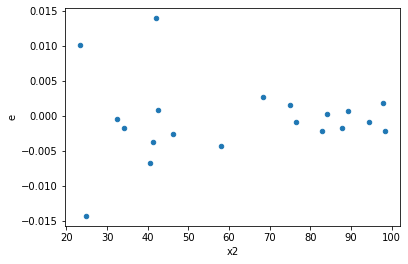

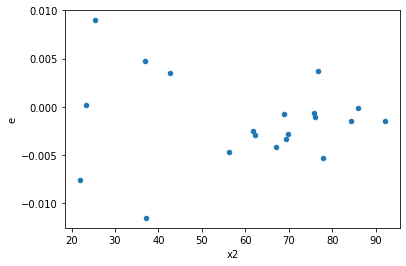

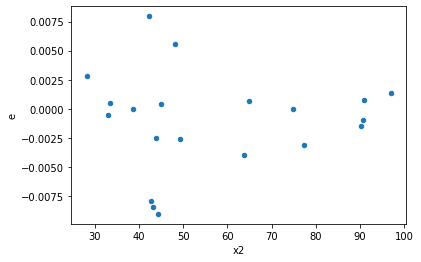

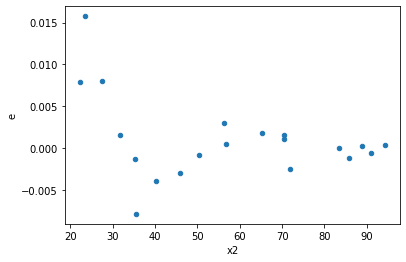

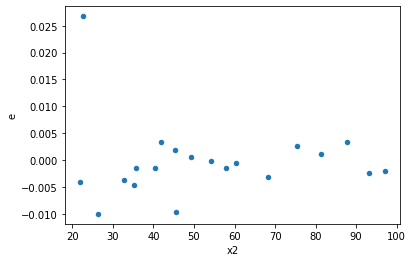

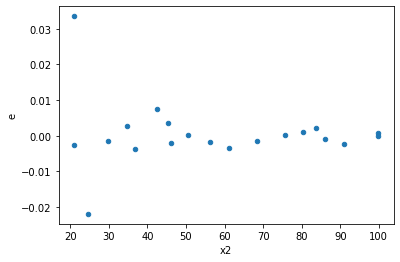

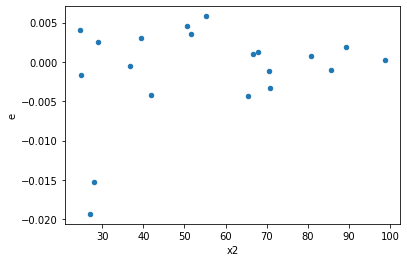

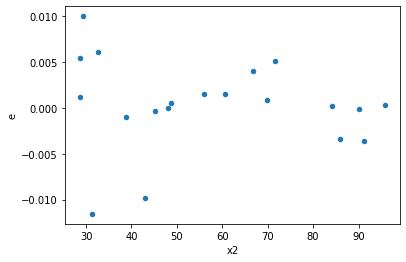

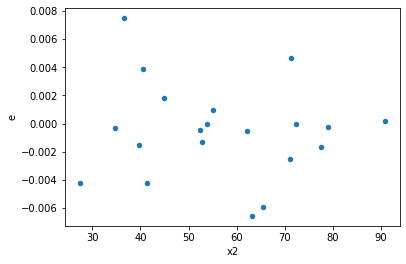

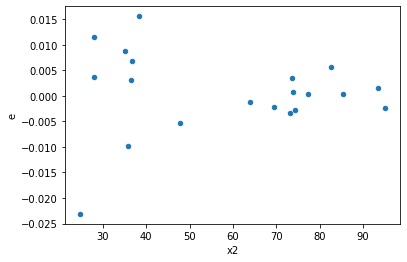

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,4.0,3.1448084322135043e-05,0.00015742516359631308,7.862021080533761e-06,3.935629089907827e-05,5.005874506814007,0.14787655258008137,0.9260617237099593,0.07393827629004068,Reject005=1 : Homoscedasticity
10.0,4.0,4.0,9.960244284330487e-06,1.006919996540088e-05,2.4900610710826217e-06,2.51729999135022e-06,1.010939057111461,0.9918404171625781,0.504079791418711,0.49592020858128905,Reject005=1 : Homoscedasticity
12.0,4.0,4.0,8.980867565467395e-06,1.5655584016817805e-05,2.2452168913668488e-06,3.913896004204451e-06,1.743215107303838,0.6035506547910137,0.6982246726044932,0.30177532739550683,Reject005=1 : Homoscedasticity
18.0,4.0,4.0,0.00011779748418136848,0.00020012357098986828,2.944937104534212e-05,5.003089274746707e-05,1.6988781414189231,0.6202550685174795,0.6898724657412603,0.31012753425873973,Reject005=1 : Homoscedasticity
21.0,4.0,4.0,4.3274639409710474e-05,0.0002928461912923593,1.0818659852427619e-05,7.321154782308983e-05,6.7671549731422385,0.09091877081094957,0.9545406145945252,0.045459385405474784,Reject005=1 : Homoscedasticity
22.0,4.0,4.0,1.3676929222185003e-05,4.021220567923705e-05,3.4192323055462507e-06,1.0053051419809262e-05,2.9401487004853286,0.32108748251859653,0.8394562587407017,0.16054374125929827,Reject005=1 : Homoscedasticity
28.0,4.0,4.0,3.558782238878155e-05,0.00020517256830460029,8.896955597195387e-06,5.129314207615007e-05,5.765246495365151,0.11817594625193428,0.9409120268740329,0.05908797312596714,Reject005=1 : Homoscedasticity
35.0,4.0,4.0,6.358729257281333e-05,8.239580997072986e-05,1.5896823143203333e-05,2.0598952492682466e-05,1.2957905052551033,0.8078088052525274,0.5960955973737363,0.4039044026262637,Reject005=1 : Homoscedasticity
36.0,4.0,4.0,2.6892592776807636e-05,3.1937740226959775e-05,6.723148194201909e-06,7.984435056739944e-06,1.1876036086227844,0.8716789644947818,0.5641605177526091,0.4358394822473909,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,3.1448084322135043e-05,0.00015742516359631308,7.862021080533761e-06,3.935629089907827e-05,5.005874506814007,0.14787655258008137,Reject005=1 : Homoscedasticity
1.0,4.0,4.0,5.488556024157462e-05,2.716381879483006e-05,1.3721390060393656e-05,6.790954698707515e-06,0.4949174004104281,0.5124845379219708,Reject005=1 : Homoscedasticity
2.0,4.0,4.0,8.126650959939059e-05,4.870681795837023e-05,2.0316627399847647e-05,1.2176704489592557e-05,0.5993467444150632,0.6320946166587287,Reject005=1 : Homoscedasticity
3.0,4.0,4.0,8.999567662123462e-05,1.8836753455726315e-05,2.2498919155308655e-05,4.709188363931579e-06,0.20930731522809345,0.15900108061417031,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,0.0004358461545431126,2.940998512018811e-06,0.00010896153863577815,7.352496280047027e-07,0.0067477904333050525,0.0002683416669107803,Reject005=0 : Heteroscedasticity
5.0,4.0,4.0,0.0009777859868339773,4.8765792568112815e-06,0.0002444464967084943,1.2191448142028204e-06,0.004987368731476102,0.00014727661464779095,Reject005=0 : Heteroscedasticity
6.0,4.0,4.0,0.00030211479535685674,9.568203443092102e-06,7.552869883921418e-05,2.3920508607730255e-06,0.031670754263425534,0.005538669932894317,Reject005=0 : Heteroscedasticity
7.0,4.0,4.0,1.4961608426489808e-05,1.4308448030204093e-05,3.740402106622452e-06,3.5771120075510234e-06,0.9563442393580304,0.9665331027731213,Reject005=1 : Homoscedasticity
8.0,4.0,4.0,4.0135765547716725e-05,2.6624561172200486e-05,1.0033941386929181e-05,6.6561402930501215e-06,0.6633624850271512,0.7005691307866125,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      723
Reject005=0 : Heteroscedasticity    277
Name: Result_test, dtype: int64